<a href="https://colab.research.google.com/github/Winskiii/RepoGit/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

el Baru 2: Analisis Bivariat (Kategorikal vs. Target)
Sel ini akan membantu Anda memahami hubungan antara fitur kategorikal (contoh: casualty_class) dengan tingkat keparahan korban.

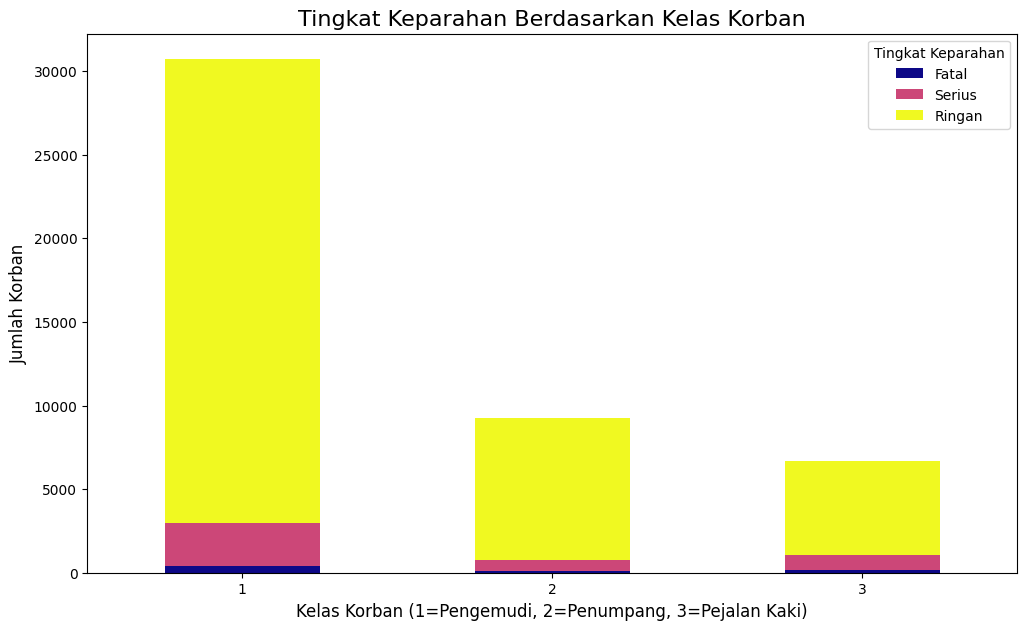

Tabel Silang Kelas Korban vs Tingkat Keparahan:
casualty_severity    1     2      3
casualty_class                     
1                  393  2602  27707
2                   83   666   8496
3                  168   914   5620


In [ ]:
# SEL BARU 2: ANALISIS BIVARIAT - KELAS KORBAN VS TINGKAT KEPARAHAN

# Membuat tabel silang untuk melihat hubungan antara kelas korban dan tingkat keparahan
crosstab_class = pd.crosstab(df['casualty_class'], df['casualty_severity'])

# Membuat stacked bar chart
crosstab_class.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='plasma')
plt.title('Tingkat Keparahan Berdasarkan Kelas Korban', fontsize=16)
plt.xlabel('Kelas Korban (1=Pengemudi, 2=Penumpang, 3=Pejalan Kaki)', fontsize=12)
plt.ylabel('Jumlah Korban', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Tingkat Keparahan', labels=['Fatal', 'Serius', 'Ringan'])
plt.show()

print("Tabel Silang Kelas Korban vs Tingkat Keparahan:")
print(crosstab_class)

Sel Baru 3: Analisis Bivariat (Numerik vs. Target)
Sel ini membandingkan distribusi fitur numerik (contoh: age_of_casualty) untuk setiap kategori tingkat keparahan.

<ipython-input-24-1020726978>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette='magma')


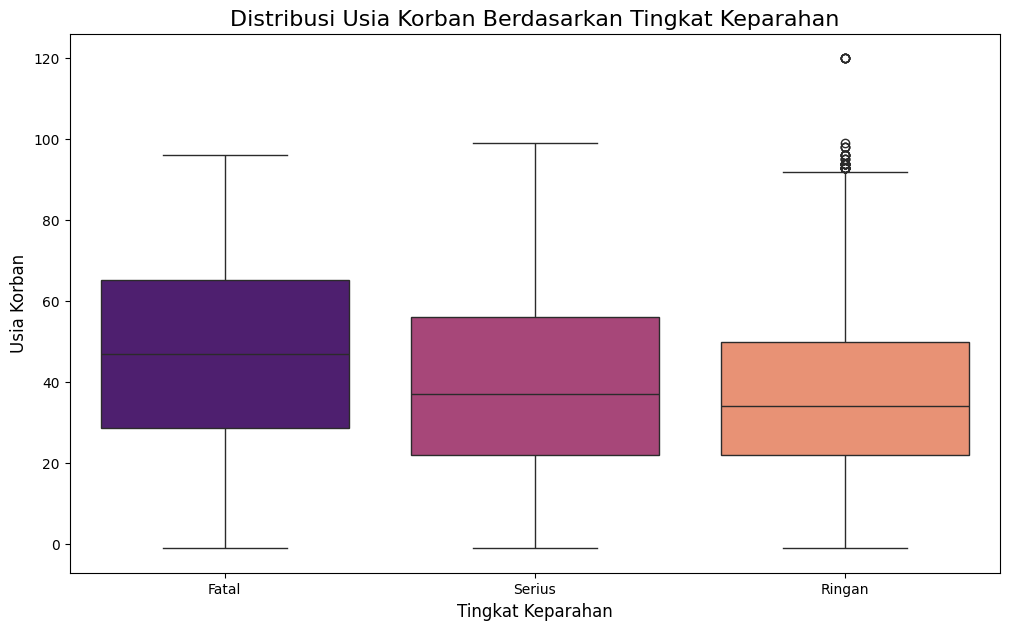

In [ ]:
# SEL BARU 3: ANALISIS BIVARIAT - USIA VS TINGKAT KEPARAHAN

plt.figure(figsize=(12, 7))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette='magma')
plt.title('Distribusi Usia Korban Berdasarkan Tingkat Keparahan', fontsize=16)
plt.xlabel('Tingkat Keparahan', fontsize=12)
plt.ylabel('Usia Korban', fontsize=12)
plt.xticks([0, 1, 2], ['Fatal', 'Serius', 'Ringan'])
plt.show()

Sel Baru 4: Heatmap Korelasi Fitur Numerik
Sel ini akan menunjukkan korelasi atau hubungan linear antara semua fitur numerik dalam dataset Anda.

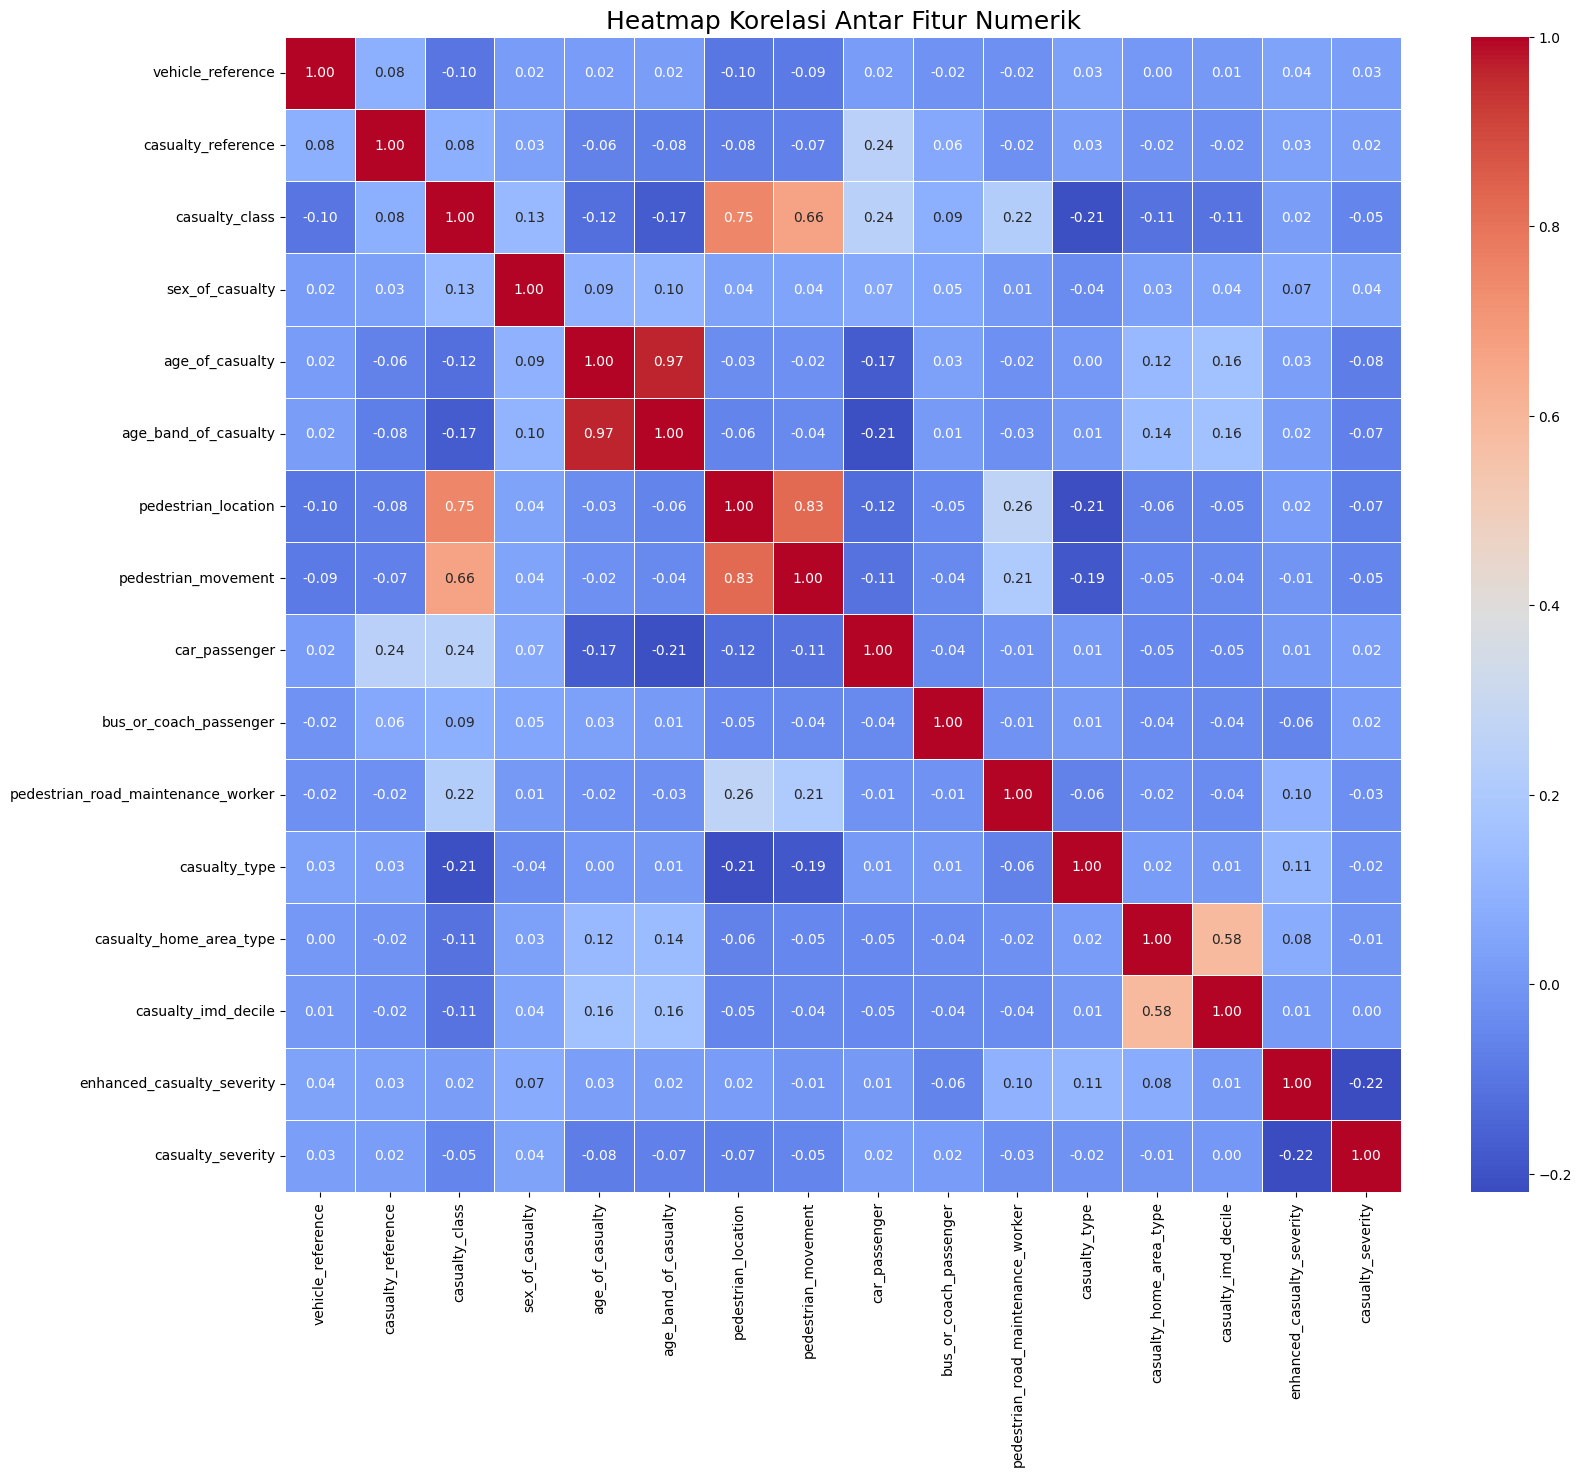

In [ ]:
# SEL BARU 4: HEATMAP KORELASI FITUR NUMERIK

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=18)
plt.show()

el Baru 5: Rekayasa Fitur (Feature Engineering)
Ini adalah sel yang sangat penting untuk menciptakan fitur baru yang dapat membantu model belajar lebih baik. Di sini kita akan membuat grup usia dan menerapkan penskalaan fitur.

In [ ]:
# SEL BARU 5: REKAYASA FITUR (FEATURE ENGINEERING)

from sklearn.preprocessing import StandardScaler

# Salin dataframe yang sudah bersih untuk rekayasa fitur
df_engineered = df.copy()

# 1. Membuat Kategori Usia
bins = [0, 12, 18, 25, 60, 120]
labels = ['Anak-anak', 'Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
df_engineered['age_group'] = pd.cut(df_engineered['age_of_casualty'], bins=bins, labels=labels, right=False)

# 2. One-Hot Encoding untuk fitur kategorikal baru 'age_group'
# Ini mengubah kategori menjadi kolom biner, yang lebih baik untuk sebagian besar model
df_engineered = pd.get_dummies(df_engineered, columns=['age_group'], drop_first=True)

# 3. Penskalaan Fitur Numerik
# Ini penting untuk model seperti KNN dan dapat membantu beberapa model lain
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Buat salinan dari data fitur Anda untuk diskalakan
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Contoh data setelah Feature Scaling:")
print(X_scaled.head())

Contoh data setelah Feature Scaling:
   collision_index  vehicle_reference  casualty_reference  casualty_class  \
0        -0.707609          -0.315512           -0.279250        2.066450   
1        -1.259596          -0.315512           -0.279250       -0.662473   
2        -0.971330           0.376983           -0.279250        0.701989   
3        -0.071467          -0.315512           -0.279250        2.066450   
4        -1.600643          -0.315512            0.509818        0.701989   

   sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0         1.146441        -1.921833             -2.937694   
1         1.146441         0.196557              0.270051   
2         1.146441        -1.165265             -1.333821   
3        -0.612780        -1.417455             -1.734789   
4         1.146441        -0.055632              0.270051   

   pedestrian_location  pedestrian_movement  car_passenger  \
0             1.458953             0.167296      -0.303640   
1        

Sel Baru 6: Evaluasi Model dengan Metrik Lanjutan
Setelah melatih model terbaik Anda (misalnya best_gb dari kode Anda sebelumnya), gunakan sel ini untuk mengevaluasinya dengan metrik yang lebih komprehensif.

Laporan Klasifikasi untuk VotingClassifier:
              precision    recall  f1-score   support

       Fatal       1.00      0.74      0.85       129
      Serius       1.00      0.68      0.81       836
      Ringan       0.96      1.00      0.98      8365

    accuracy                           0.97      9330
   macro avg       0.99      0.81      0.88      9330
weighted avg       0.97      0.97      0.96      9330


Confusion Matrix:


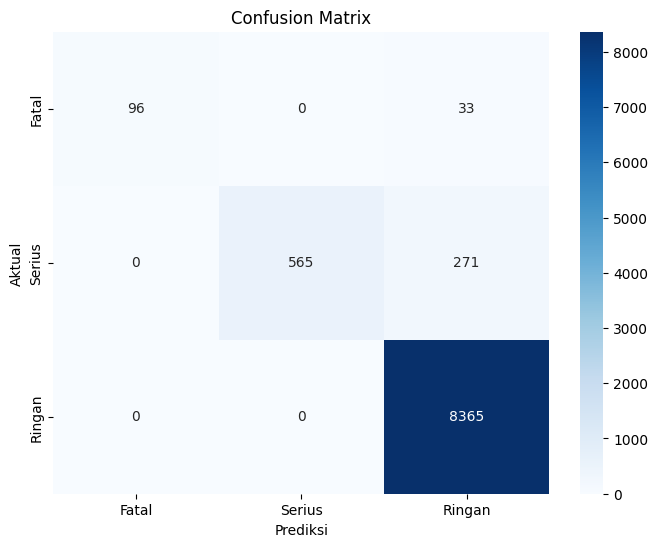

In [ ]:
# SEL BARU 6: EVALUASI MODEL DENGAN METRIK LANJUTAN

from sklearn.metrics import classification_report, confusion_matrix

# Pastikan model terbaik Anda (misal: voting_clf) sudah dilatih
# Jika belum, jalankan kembali sel pelatihan model Anda (sel kode [11])

# Membuat prediksi pada data uji
y_pred_final = voting_clf.predict(X_test)

# Menampilkan Classification Report (Precision, Recall, F1-Score)
# Label target (y) dikurangi 1, jadi 0=Fatal, 1=Serius, 2=Ringan
print("Laporan Klasifikasi untuk VotingClassifier:")
print(classification_report(y_test, y_pred_final, target_names=['Fatal', 'Serius', 'Ringan']))

# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fatal', 'Serius', 'Ringan'], yticklabels=['Fatal', 'Serius', 'Ringan'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-28-1833440936>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='rocket')


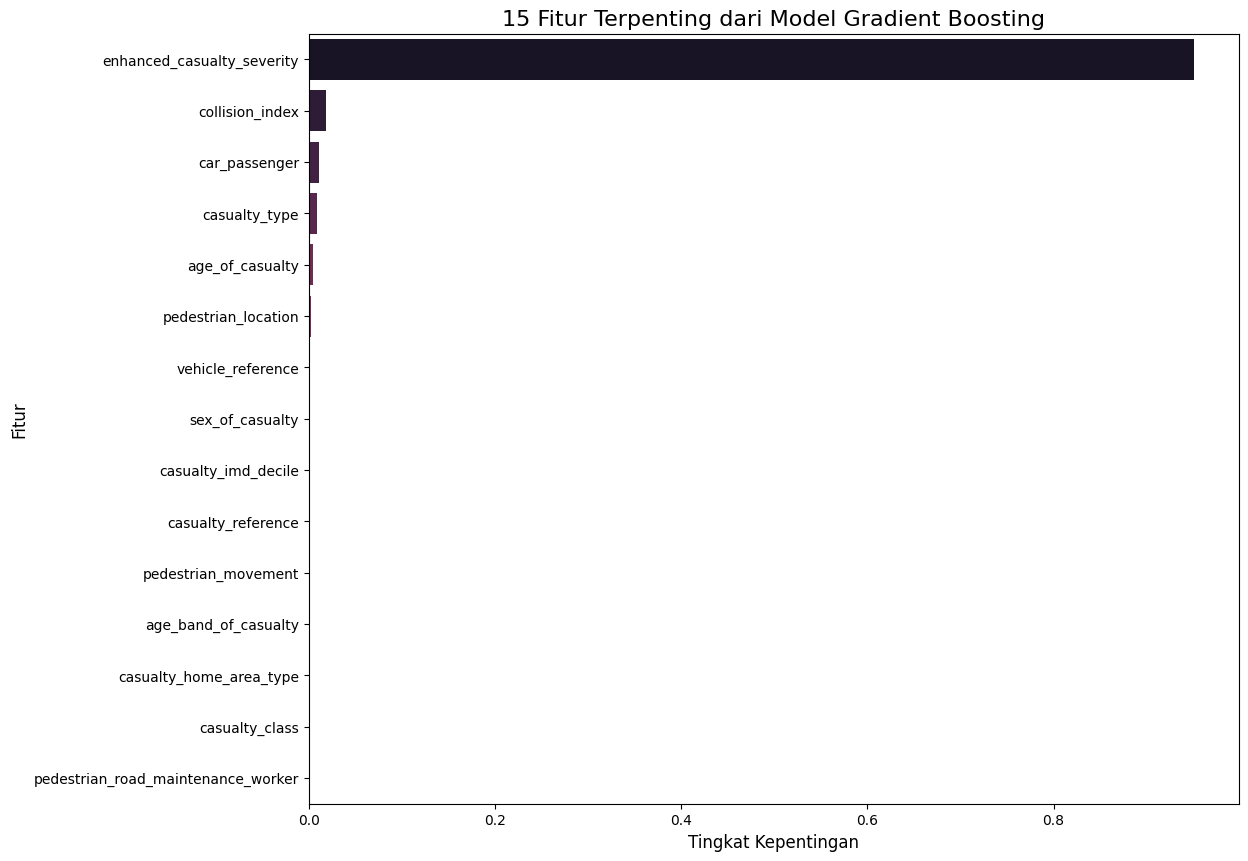

In [ ]:
# SEL BARU 7: ANALISIS PENTINGNYA FITUR (FEATURE IMPORTANCE)

# Menggunakan model Gradient Boosting yang sudah dilatih
importances = best_gb.feature_importances_
feature_names = X.columns

# Membuat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Menampilkan 15 fitur teratas
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='rocket')
plt.title('15 Fitur Terpenting dari Model Gradient Boosting', fontsize=16)
plt.xlabel('Tingkat Kepentingan', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()